### 第一部分

#### 单层神经网络回顾

Chapter2中的自适应线性神经元Adaline结构如下：

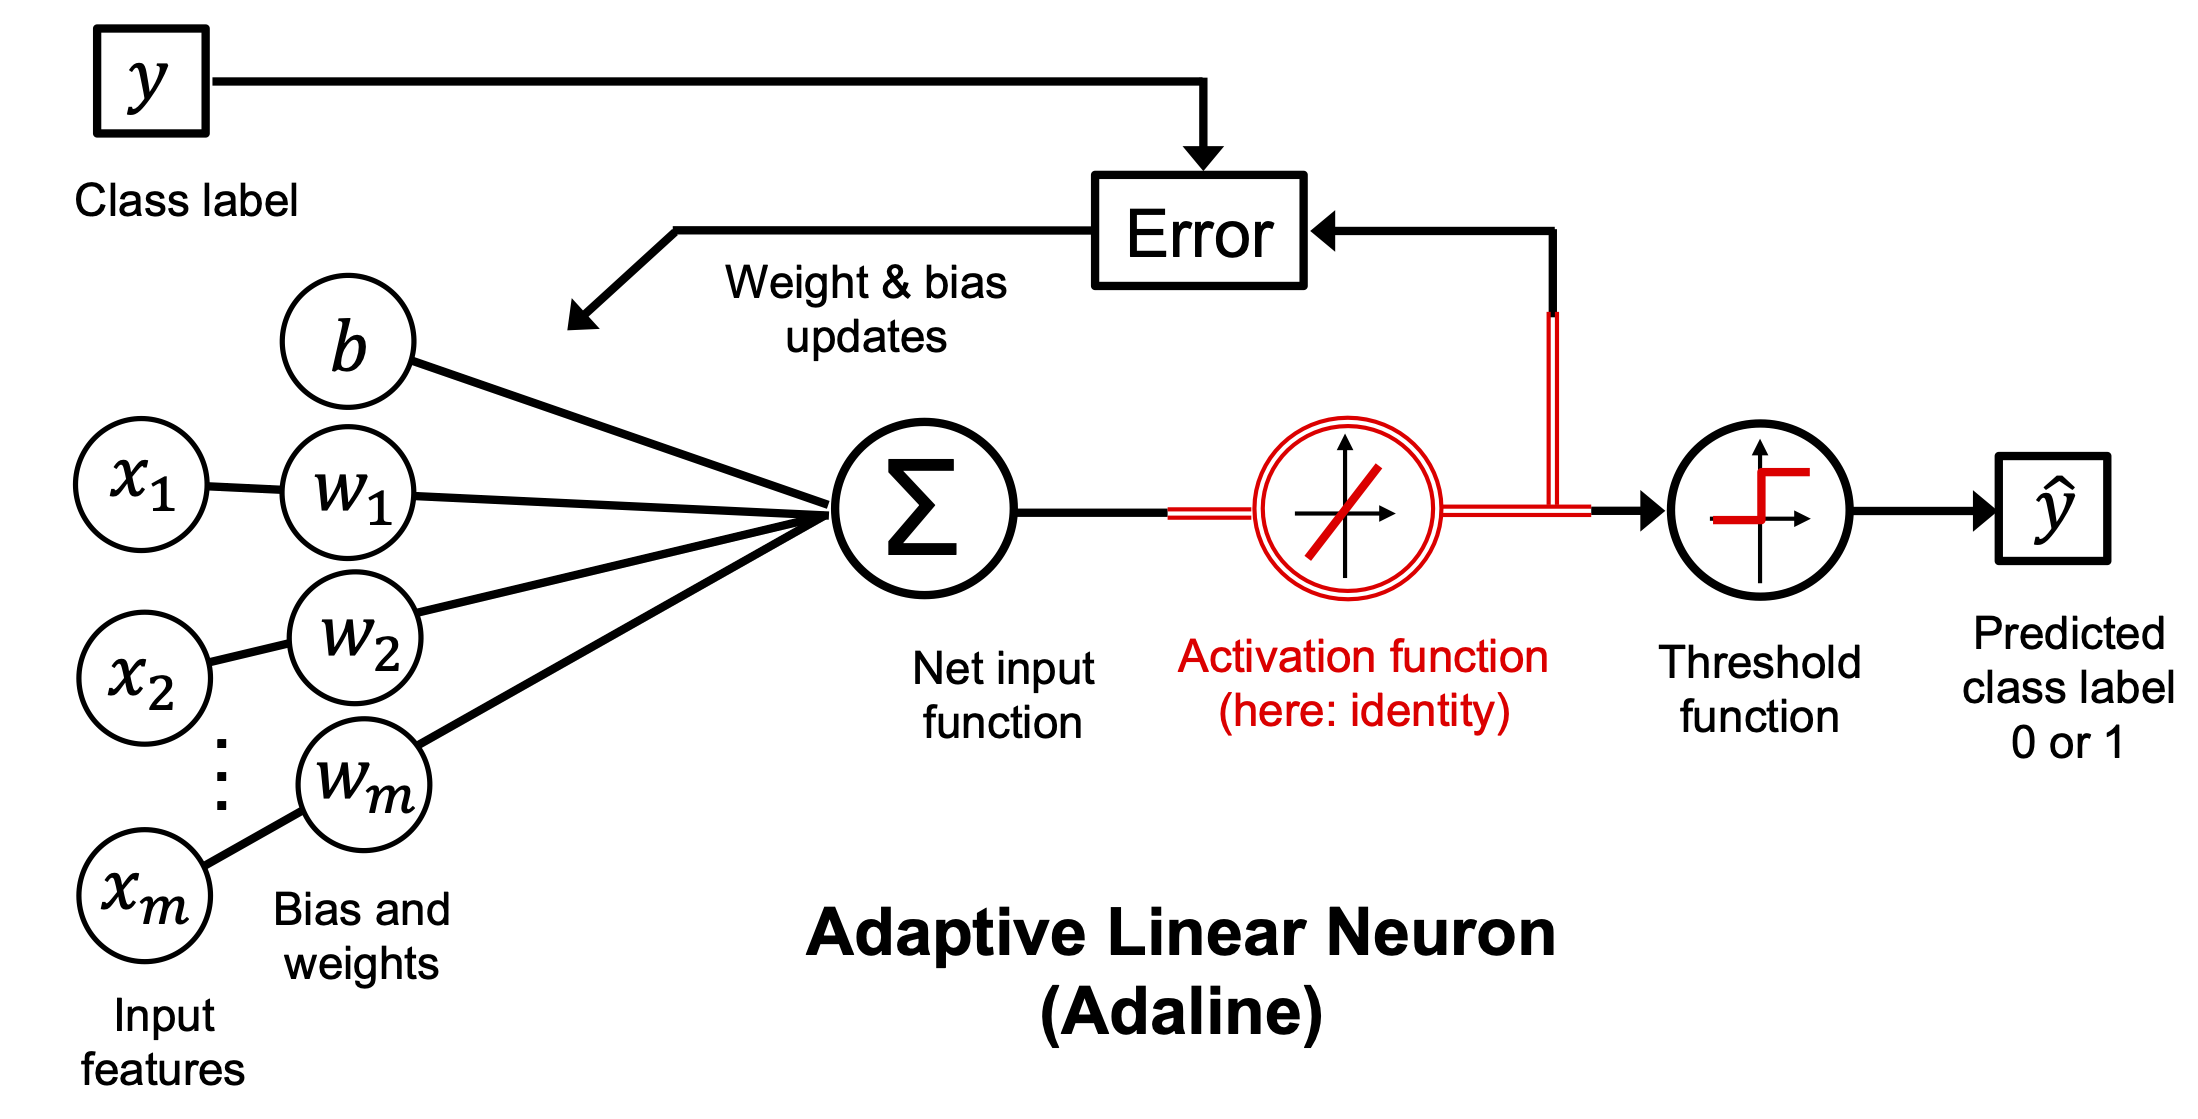

In [1]:
from IPython.display import Image

Image(filename='../Python-MachineLearning/Attached_images/Chapter11/figures/11_01.png', 
      width=450)

当利用梯度下降算法来学习模型的权重系数时，使用如下规则更新权重向量和偏置单元：

$$\boldsymbol w:=\boldsymbol w+\Delta \boldsymbol w,\quad b:=b+\Delta b$$

其中，$$\Delta w_{j}=-\eta\frac{\partial L}{\partial w_{j}}\\
\Delta b=-\eta\frac{\partial L}{\partial b}$$也就是说，使用整个训练数据集来计算梯度，并通过损失函数梯度的负方向来更新权重.

同时，为了找到模型的最佳权重，需要定义一个目标函数，通常采用的是均方误差MSE; 此外，还通过学习率$\eta$来控制梯度下降速度. 以权重更新过程为例，损失函数对其的偏导数如下：

$$\frac{\partial L}{\partial w_j}=\frac{\partial}{\partial w_j}\frac{1}{n}\sum_i\bigl(y^{(i)}-a^{(i)}\bigr)^2=-\frac{2}{n}\sum_i\bigl(y^{(i)}-a^{(i)}\bigr)x_j^{(i)}$$

在上式中，$a^{(i)}$是神经元的激活activation. 在Adaline中它是一个线性函数：

$$\sigma(\cdot)=z=a$$

并且净输入(net input)$z$定义为输入层和输出层权重的线性组合：

$$z=\sum_jw_jx_j+b=\boldsymbol w^Tx+b$$

最后，利用一个阈值函数来实现二分类：

$$\hat{y}=\left\{\begin{matrix}1&\text{if}\quad z\geq0;\\0&\text{otherwise}\end{matrix}\right.$$



#### 多层神经网络

MLP是一种经典的全连接神经网络，结构如下：

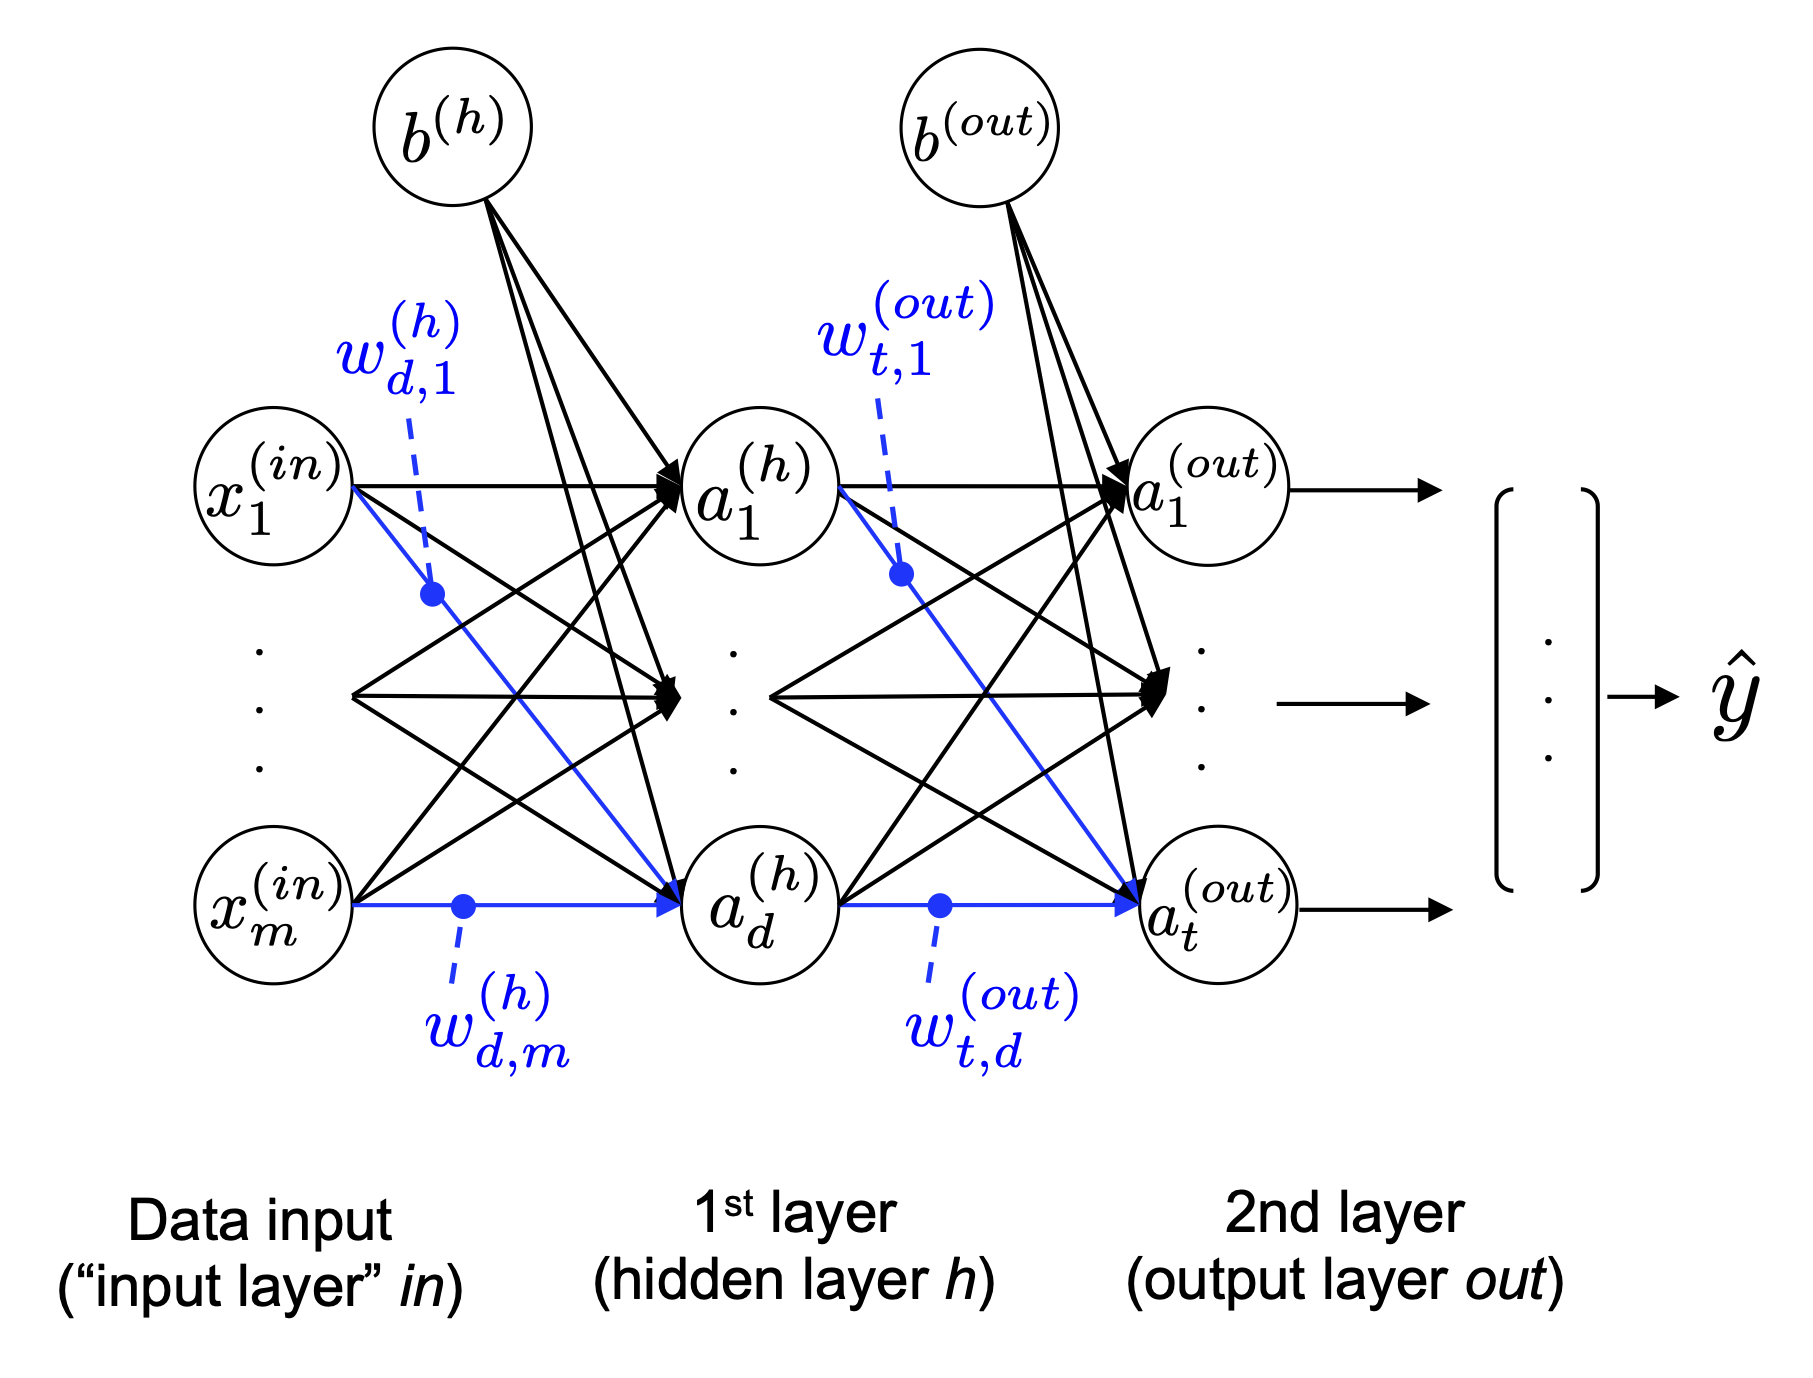

In [2]:
Image(filename='../Python-MachineLearning/Attached_images/Chapter11/figures/11_02.png', 
      width=450)

在上图中，为了直观起见，使用上标$in$表示输入特征、使用上标$h$表示隐藏层、使用上标$out$表示输出层。

例如：$x_i^{(in)}$表示第$i$哥个输入特征、$a_i^{(h)}$表示隐藏层的第$i$个单元、$a_i^{(out)}$表示输出层的第$i$个单元.

前一层$l$中的每个节点都通过权重系数与后一层$l+1$中所有节点连接， 例如：第$l$层的第$k$个单元与第$l+1$层的第$j$个单元之间的连接记作：$w_{j,k}^{(l+1)}$.

#### 通过前向传递激活神经网络

MLP的学习过程可以总结为如下步骤：

* 1.从输入层开始，通过前向传递训练数据的模式以生成网络输出；
* 2.根据网络输出，来计算想要最小化的损失函数；
* 3.损失反向传播(backpropagate the loss), 找到网络中每个权重和偏置单元的导数，并更新模型;

在重复上述步骤多个Epoch之后，使用前向传递来学习计算得到网络输出，并使用阈值函数来获得one-hot表示的预测类别标签. 计算过程如下：

$$\begin{aligned}&z_{1}^{(h)}=x_{1}^{(in)}w_{1,1}^{(h)}+x_{2}^{(in)}w_{1,2}^{(h)}+\cdots+x_{m}^{(in)}w_{1,m}^{(h)}\\&a_{1}^{(h)}=\sigma\big(z_{1}^{(h)}\big)\end{aligned}$$

其中，$z_{1}^{(h)}$是净输入，$\sigma{(\cdot)}$是激活函数, 其需要是可微的，以便使用基于梯度的方法来学习权重系数. 同时为了能够解决如图像分类等复杂问题，它还需要是非线性的. 例如sigmoid激活函数：
$$\sigma(z)=\frac1{1+e^{-z}}$$

其函数图像如下：


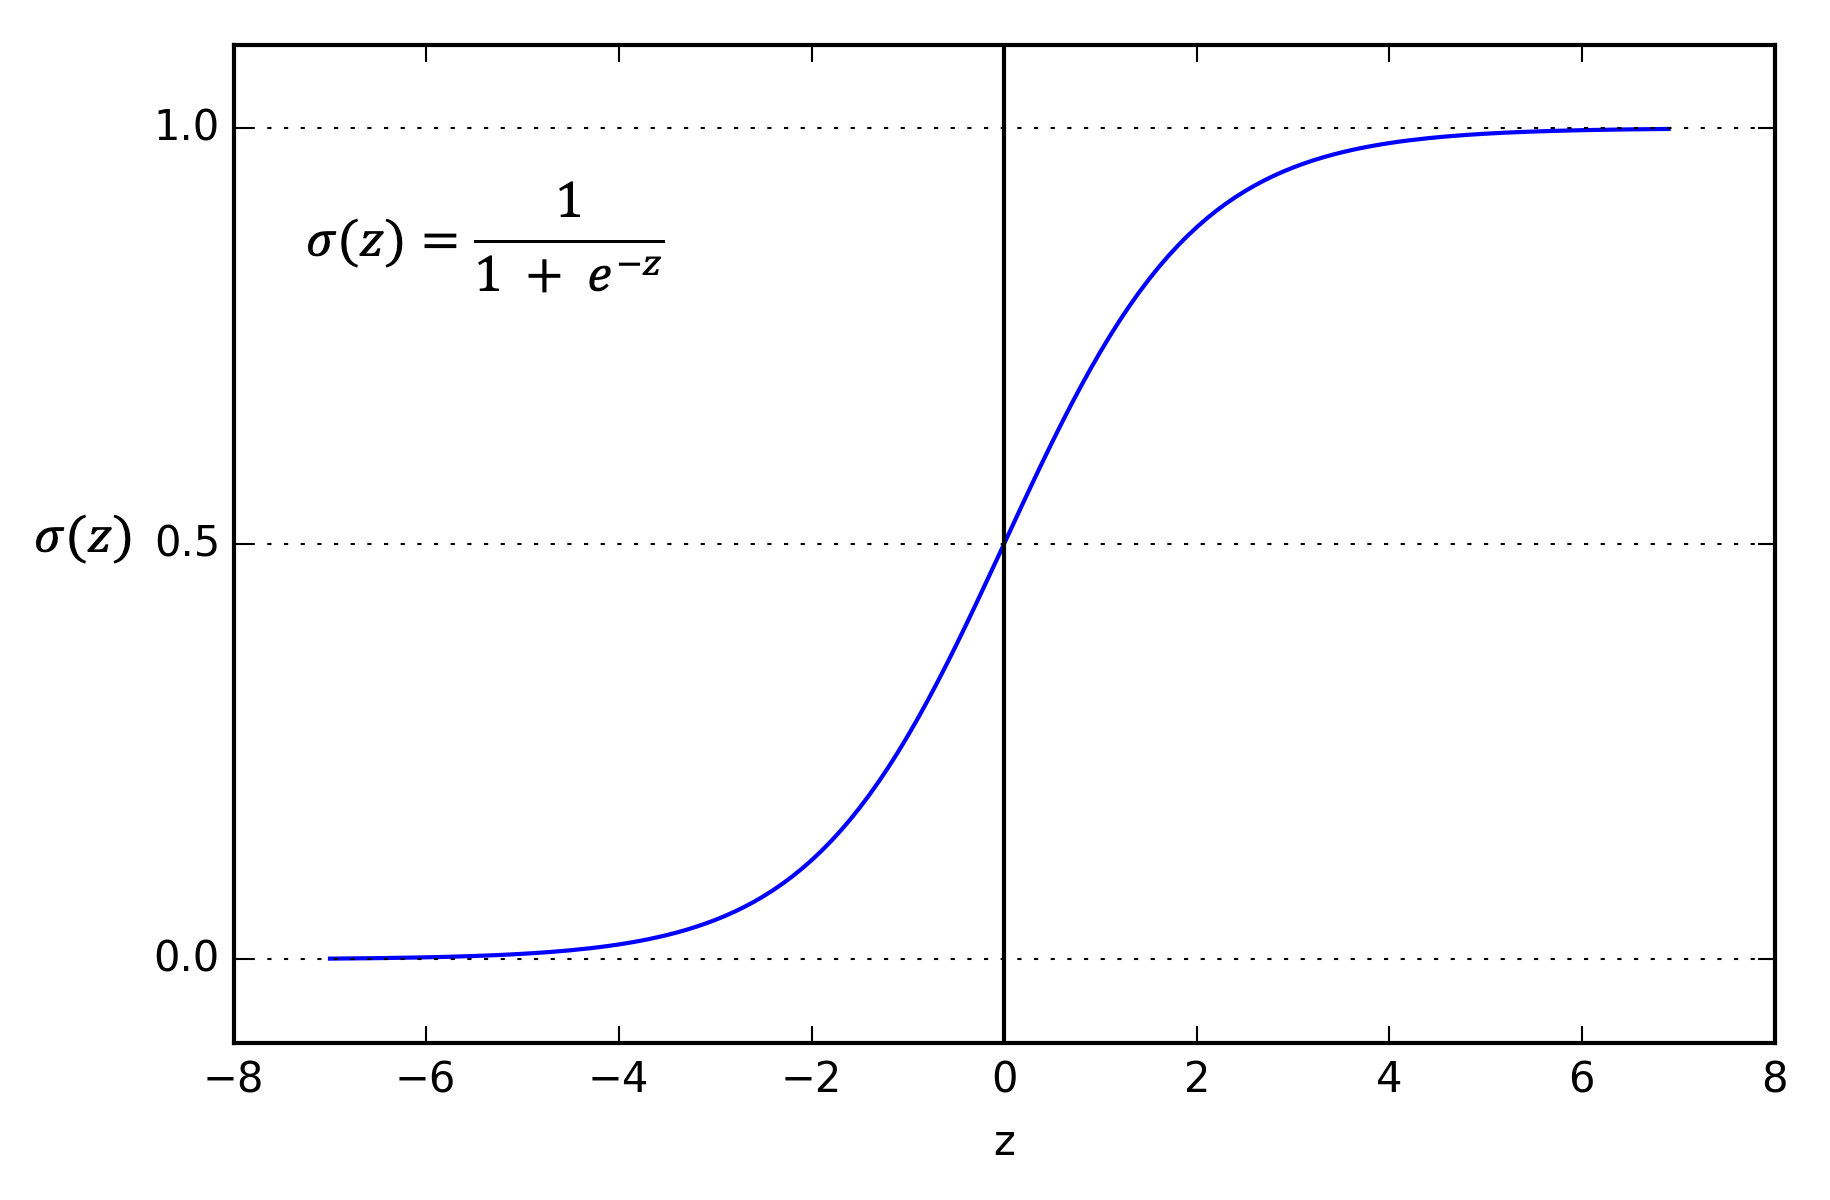

In [3]:
Image(filename='../Python-MachineLearning/Attached_images/Chapter11/figures/11_03.png', 
      width=450)

为了进一步简化书写，将上述计算过程记为：
$$\begin{aligned}&z^{(h)}=\boldsymbol x^{(in)}\boldsymbol W^{(h)T}+\boldsymbol b^{(h)}\\&a^{(h)}=\sigma\big(\mathbf{z}^{(h)}\big)\end{aligned}$$

其中，$\boldsymbol x^{(in)}$是$1\times m$维的特征向量、$\boldsymbol W^{(h)}$是$d\times m$维的权重矩阵，$d$是隐层神经元的个数. 偏置向量$\boldsymbol b^{(h)}$也由$d$个偏置单元组成，即每个隐层节点一个.

所以，在经过矩阵乘法之后，得到了维度为$1\times d$的净输入$z^{(h)}$, 用它来计算激活$\boldsymbol a^{(h)}$， ${\boldsymbol a^{(h)}\in\mathbb{R}^{1\times d}}$. 进一步可得：

$$\boldsymbol Z^{(h)}=\boldsymbol X^{(in)}\boldsymbol W^{(h)T}+\boldsymbol b^{(h)}$$

于是在经过激活函数后，得到：
$$\boldsymbol A^{(h)}=\sigma\big(\boldsymbol Z^{(h)}\big)$$

类似地，可以将输出层的激活写为如下形式：
$$\boldsymbol Z^{(out)}=\boldsymbol A^{(h)}\boldsymbol W^{(out)T}+\boldsymbol b^{(out)}$$

最后，利用sigmoid激活函数得到网络输出：
$$\boldsymbol A^{(out)}=\sigma({\boldsymbol Z}^{(out)})$$

#### 手写数字分类

In [4]:
# 获取MNIST数据集.
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', version=1, 
                    return_X_y=True)

In [5]:
print(type(X), type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [6]:
X.head(5)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [8]:
X = X.values
y = y.astype(int).values

In [9]:
print(X.shape, y.shape)

(70000, 784) (70000,)


In [10]:
# 数据归一化.
"""
1.缩放到正负一之间;
2.通过减去0.5， 使数据均值接近于0，实现中心化;
3.减少梯度消失或爆炸风险；
"""
X = ((X/255.) - .5) * 2

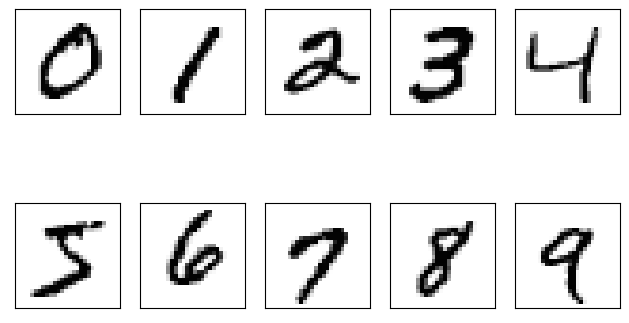

In [11]:
# 可视化样本示例.
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, 
                       sharex=True, sharey=True)

ax = ax.flatten()
for i in range(10):
    img = X[y==i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

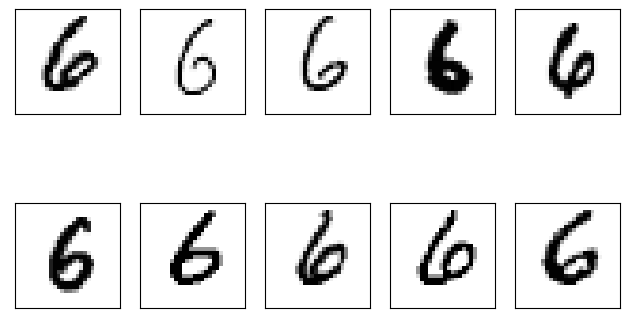

In [12]:
# 查看同一个数字的不同形式.
# 可视化样本示例.
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, 
                       sharex=True, sharey=True)

ax = ax.flatten()
for i in range(10):
    img = X[y==6][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [13]:
# 将数据划分为训练集、验证集和测试集.
from sklearn.model_selection import train_test_split

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=10000, 
                                                  random_state=123, stratify=y)

X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=5000, 
                                                      random_state=123, stratify=y_temp)

In [14]:
# optional to free up some memory by deleting non-used arrays:
del X_temp, y_temp, X, y

In [15]:
print(X_train.shape, y_train.shape)

print(X_valid.shape, y_valid.shape)

print(X_test.shape, y_test.shape)

(55000, 784) (55000,)
(5000, 784) (5000,)
(10000, 784) (10000,)


#### 实现一个多层感知机

In [18]:
import numpy as np

"""
定义两个辅助函数，一个用于计算激活，一个用于将整数类别
标签转换为独热编码.
"""
def sigmoid(z):
    return 1. / (1. + np.exp(-z))

def int_to_onehot(y, num_labels):
    ary = np.zeros((y.shape[0], num_labels))
    for i, val in enumerate(y):
        ary[i, val] = 1
    return ary

"""
构建NeuralNetMLP的类，包含有三部分内容：
    __init__;
    forward;
    backward;
"""
class NeuralNetMLP:

    def __init__(self, num_features, num_hidden, num_classes, random_seed=123):
        super().__init__()

        self.num_classess = num_classes

        # 对于隐藏层参数.
        rng = np.random.RandomState(random_seed)
        self.weight_h = rng.normal(loc=0.0, 
                                scale=0.1, size=(num_hidden, num_features))
        self.bias_h = np.zeros(num_hidden)

        # 对于输出层参数.
        self.weight_out = rng.normal(loc=0.0, 
                                    scale=0.1, size=(num_classes, num_hidden))
        self.bias_out = np.zeros(num_classes)

    # 前向传递计算激活.
    def forward(self, x):

        # 对于隐层.
        # input dim: [n_examples, n_features] dot [n_hidden, n_features].T.
        # output dim: [n_examples, n_hidden].
        z_h = np.dot(x, self.weight_h.T) + self.bias_h
        a_h = sigmoid(z_h)

        # 对于输出层.
        # input dim: [n_examples, n_hidden] dot [n_classes, n_hidden].T.
        # output dim: [n_examples, n_classes].
        z_out = np.dot(a_h, self.weight_out.T) + self.bias_out
        a_out = sigmoid(z_out)

        # 结果返回.
        return a_h, a_out
    
    # 反向传播计算损失.
    def backward(self, x, a_h, a_out, y):

        # 独热编码.
        y_onehot = int_to_onehot(y, self.num_classess)

        # 计算偏导数.

        # 首先是输出层到隐层.
        d_loss__d_a_out = 2 * (a_out - y_onehot) / y.shape[0]

        d_a_out__d_z_out = a_out * (1 - a_out)

        d_z_out__dw_out = a_h

        delta_out = d_loss__d_a_out * d_a_out__d_z_out

        d_loss__dw_out = np.dot(delta_out.T, d_z_out__dw_out)
        d_loss_db_out = np.sum(delta_out, axis=0)

        # 然后是隐层到输入层.
        d_z_out__a_h = self.weight_out

        d_loss__a_h = np.dot(delta_out, d_z_out__a_h)

        d_a_h__d_z_h = a_h * (1 - a_h)

        d_z_h__d_w_h = x

        d_loss__d_w_h = np.dot((d_loss__a_h * d_a_h__d_z_h).T, d_z_h__d_w_h)
        d_loss__d_b_h = np.sum((d_loss__a_h * d_a_h__d_z_h), axis=0)

        return (d_loss__dw_out, d_loss_db_out, 
                d_loss__d_w_h, d_loss__d_b_h)

In [19]:
# 模型初始化.
model = NeuralNetMLP(num_features=28*28, 
                     num_hidden=50, 
                     num_classes=10)

#### 构建训练循环

In [20]:
# 首先是dataloader.
import numpy as np

num_epochs = 50
minibatch_size = 100

def minibatch_generator(X, y, minibatch_size):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    for start_idx in range(0, indices.shape[0] - minibatch_size + 1, 
                           minibatch_size):
        batch_idx = indices[start_idx:start_idx + minibatch_size]

        yield X[batch_idx], y[batch_idx]

# 在每个Epoch中迭代.
for i in range(num_epochs):

    minibatch_gen = minibatch_generator(X_train, 
                                        y_train, minibatch_size)
    
    for X_train_mini, y_train_mini in minibatch_gen:

        break
    break

print(X_train_mini.shape)
print(y_train_mini.shape)

(100, 784)
(100,)


In [22]:
# 然后定义损失函数和评价指标criteria.
def mse_loss(targets, probas, num_labels=10):
    onehot_targets = int_to_onehot(targets, num_labels=num_labels)
    return np.mean((onehot_targets - probas)**2)

def accuracy(targets, predicted_labels):
    return np.mean(predicted_labels == targets)

_, probas = model.forward(X_valid)
mse = mse_loss(y_valid, probas)

predicted_labels = np.argmax(probas, axis=1)
acc = accuracy(y_valid, predicted_labels)

print(f"Initial validation MSE: {mse: .1f}")
print(f"Initial validation accuracy: {acc*100:.1f}%")

Initial validation MSE:  0.3
Initial validation accuracy: 9.4%


In [23]:
# 根据数据生成器来将上述功能封装.
def compute_mse_and_acc(nnet, X, y, num_labels=10, minibatch_size=100):
    mse, corrected_pred, num_examples = 0., 0, 0
    minibatch_gen = minibatch_generator(X, y, minibatch_size)

    for i, (features, targets) in enumerate(minibatch_gen):

        _, probas = nnet.forward(features)
        predicted_labels = np.argmax(probas, axis=1)

        onehot_targets = int_to_onehot(targets, num_labels=num_labels)
        loss = np.mean((onehot_targets - probas)**2)
        corrected_pred += (predicted_labels == targets).sum()

        num_examples += targets.shape[0]
        mse += loss
    
    mse = mse/(i+1)
    acc = corrected_pred/num_examples
    return mse, acc

In [24]:
mse, acc = compute_mse_and_acc(model, X_valid, y_valid)
print(f'Initial valid MSE: {mse:.1f}')
print(f'Initial valid accuracy: {acc*100:.1f}%')

Initial valid MSE: 0.3
Initial valid accuracy: 9.4%


In [25]:
# 模型训练.
def train(model, X_train, y_train, X_valid, y_valid, num_epochs, 
          learning_rate=0.1):
    
    epoch_loss = []
    epoch_train_acc = []
    epoch_valid_acc = []

    for e in range(num_epochs):

        # iterate over minibatches.
        minibatch_gen = minibatch_generator(X_train, y_train, minibatch_size)

        for X_train_mini, y_train_mini in minibatch_gen:
            
            # 前向传递.
            a_h, a_out = model.forward(X_train_mini)

            # 反向传播.
            d_loss__d_w_out, d_loss__d_b_out, d_loss__d_w_h, d_loss__d_b_h = \
                model.backward(X_train_mini, a_h, a_out, y_train_mini)
            
            # 参数更新.
            model.weight_h -= learning_rate * d_loss__d_w_h
            model.bias_h -= learning_rate * d_loss__d_b_h
            model.weight_out -= learning_rate * d_loss__d_w_out
            model.bias_out -= learning_rate * d_loss__d_b_out

        # 训练日志.
        train_mse, train_acc = compute_mse_and_acc(model, X_train, y_train)
        valid_mse, valid_acc = compute_mse_and_acc(model, X_valid, y_valid)
        train_acc, valid_acc = train_acc*100, valid_acc*100
        epoch_train_acc.append(train_acc)
        epoch_valid_acc.append(valid_acc)
        epoch_loss.append(train_mse)
        print(f'Epoch: {e+1:03d}/{num_epochs:03d} '
              f'| Train MSE: {train_mse:.2f} '
              f'| Train Acc: {train_acc:.2f}% '
              f'| Valid Acc: {valid_acc:.2f}%')
    return epoch_loss, epoch_train_acc, epoch_valid_acc 

In [26]:
np.random.seed(123)

epoch_loss, epoch_train_acc, epoch_valid_acc = train(
    model, X_train, y_train, X_valid, y_valid,
    num_epochs=50, learning_rate=0.1)

Epoch: 001/050 | Train MSE: 0.05 | Train Acc: 76.15% | Valid Acc: 75.98%
Epoch: 002/050 | Train MSE: 0.03 | Train Acc: 85.45% | Valid Acc: 85.04%
Epoch: 003/050 | Train MSE: 0.02 | Train Acc: 87.82% | Valid Acc: 87.60%
Epoch: 004/050 | Train MSE: 0.02 | Train Acc: 89.36% | Valid Acc: 89.28%
Epoch: 005/050 | Train MSE: 0.02 | Train Acc: 90.21% | Valid Acc: 90.04%
Epoch: 006/050 | Train MSE: 0.02 | Train Acc: 90.67% | Valid Acc: 90.54%
Epoch: 007/050 | Train MSE: 0.02 | Train Acc: 91.12% | Valid Acc: 90.82%
Epoch: 008/050 | Train MSE: 0.02 | Train Acc: 91.43% | Valid Acc: 91.26%
Epoch: 009/050 | Train MSE: 0.01 | Train Acc: 91.84% | Valid Acc: 91.50%
Epoch: 010/050 | Train MSE: 0.01 | Train Acc: 92.04% | Valid Acc: 91.84%
Epoch: 011/050 | Train MSE: 0.01 | Train Acc: 92.30% | Valid Acc: 92.08%
Epoch: 012/050 | Train MSE: 0.01 | Train Acc: 92.51% | Valid Acc: 92.24%
Epoch: 013/050 | Train MSE: 0.01 | Train Acc: 92.65% | Valid Acc: 92.30%
Epoch: 014/050 | Train MSE: 0.01 | Train Acc: 92.80

#### 性能评估

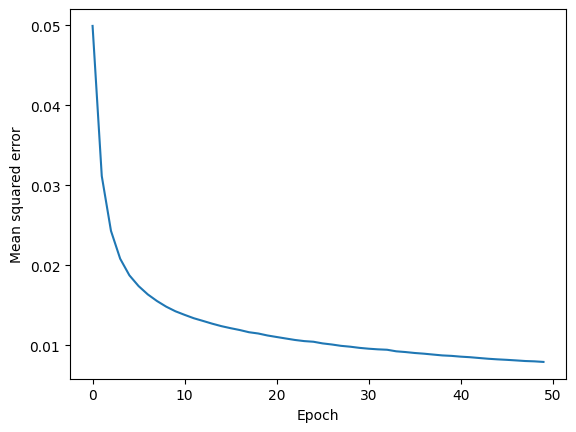

In [27]:
plt.plot(range(len(epoch_loss)), epoch_loss)
plt.xlabel('Epoch')
plt.ylabel('Mean squared error')
plt.show()

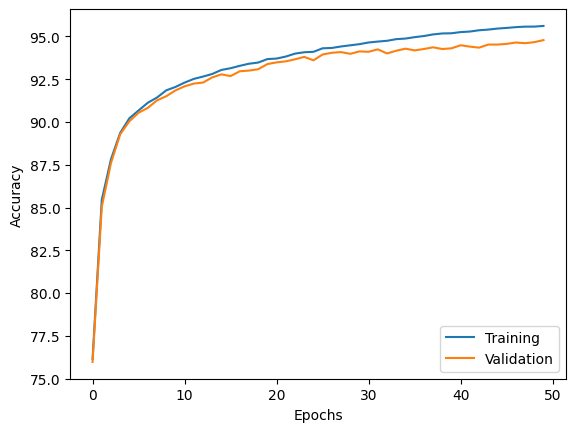

In [28]:
plt.plot(range(len(epoch_train_acc)), epoch_train_acc,
         label='Training')
plt.plot(range(len(epoch_valid_acc)), epoch_valid_acc,
         label='Validation')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend(loc='lower right')
plt.show()

In [29]:
test_mse, test_acc = compute_mse_and_acc(model, X_test, y_test)
print(f'Test mse: {test_mse:.2f}')
print(f'Test accuracy: {test_acc*100:.2f}%')

Test mse: 0.01
Test accuracy: 94.54%


#### 可视化错分类示例

In [30]:
X_test_subset = X_test[:1000, :]
y_test_subset = y_test[:1000]

_, probas = model.forward(X_test_subset)
test_pred = np.argmax(probas, axis=1)

misclassified_images = X_test_subset[y_test_subset != test_pred][:25]
misclassified_labels = test_pred[y_test_subset != test_pred][:25]
correct_labels = y_test_subset[y_test_subset != test_pred][:25]

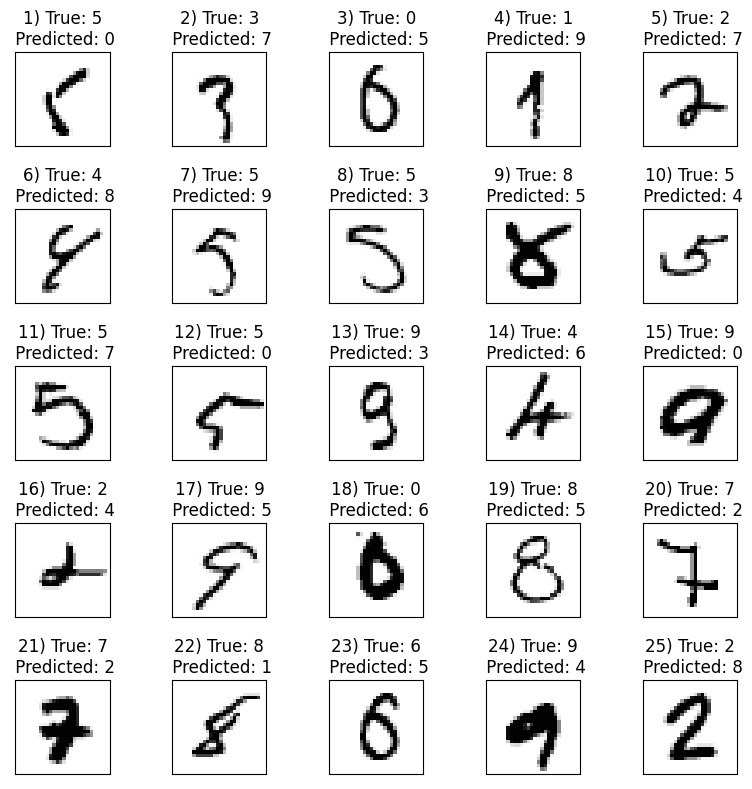

In [31]:
fig, ax = plt.subplots(nrows=5, ncols=5, 
                       sharex=True, sharey=True, figsize=(8, 8))
ax = ax.flatten()
for i in range(25):
    img = misclassified_images[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title(f'{i+1}) '
                    f'True: {correct_labels[i]}\n'
                    f' Predicted: {misclassified_labels[i]}')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

在上面的代码实现中，了解了参数更新、训练循环、模型训练与评估的代码实现过程和效果.这里为了进一步理解，将从公式和概念层面进一步说明学习过程.

### 第二部分